December 4, 2018 - Dec 5, 2018

Use the diamonds.csv file and begin your exploratory data analysis (EDA) and ddata cleaning/preparation. Upload your completed Jupyter notebook to Gihub and submit the URL to your Github repository here. 

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
#load csv file data with headers

location = "datasets/diamonds.csv"
df = pd.read_csv(location)

In [3]:
#get preview of data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#see the last 5 rows of the data
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
#get data types of variables
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [6]:
#drop Unnamed column/variable since we already have an index
df=pd.read_csv((location), index_col=0)

In [7]:
#verify
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
#find missing values
#doesn't do anything on its own
filename = "datasets/diamonds.csv"
df_missing = pd.read_csv(filename)


In [9]:
#find the sum of all missing values for each variable 

df_missing.isnull().sum()
#there are no null values

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [10]:
#number of non-NA values
df.count()

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
x          53940
y          53940
z          53940
dtype: int64

In [11]:
#descriptive stats for all of data
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Minimum value for x, y, z is 0, which isn't possible. So we should drop these values since width, length or height can't be 0. 


In [12]:
#take a look at data with values of 0
#code from @fuzzywizard's analysis on kaggle
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [13]:
#drop rows with dimensions 0
df = df[(df[['x','y','z']] != 0).all(axis=1)]
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)] #confirm it's dropped 

,carat,cut,color,clarity,depth,table,price,x,y,z


In [17]:
#do descriptive stats after data drop
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [18]:
#get median for carat
df['carat'].median()

0.7

In [19]:
#get median for price
df['price'].median()

2401.0

In [20]:
#see average price by cut
df.groupby('cut')
df['price'].groupby(df['cut']).mean()

cut
Fair         4357.500932
Good         3926.403509
Ideal        3456.941201
Premium      4579.684543
Very Good    3981.664101
Name: price, dtype: float64

In [21]:
#see average price by color 
df.groupby('color')
df['price'].groupby(df['color']).mean()

color
D    3168.106436
E    3076.752475
F    3725.080205
G    3996.876551
H    4480.942155
I    5089.973990
J    5323.818020
Name: price, dtype: float64

In [22]:
#Define price bins as 326-1000, 1001-5000, 50001- 10000, 10000-18823 
bins = [325, 1000, 5000, 10000, 18823]

# Create names for the four groups
price_group = ['Low', 'Medium', 'High', 'Too High']

#make new column with letter grades
df['price_type'] = pd.cut(df['price'], bins, labels=price_group)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_type
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Low
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Low
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Low
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Low
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Low


In [23]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_type
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Medium
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Medium
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Medium
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Medium
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,Medium


In [24]:
#number of observation per price group/type
pd.value_counts (df['price_type'])

Medium      24693
Low         14524
High         9489
Too High     5214
Name: price_type, dtype: int64

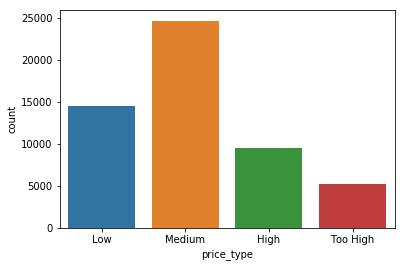

In [58]:
#count of the price groups I assigned
sns.countplot(x='price_type', data=df)

In [25]:
#average carat by price type
df.groupby('price_type')['carat'].mean()

price_type
Low         0.334937
Medium      0.712700
High        1.209080
Too High    1.740625
Name: carat, dtype: float64

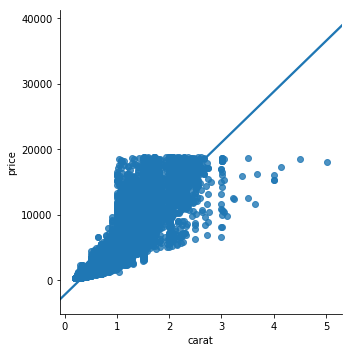

In [27]:
#scatterplot for carat and price
sns.lmplot (x='carat', y='price', data=df)

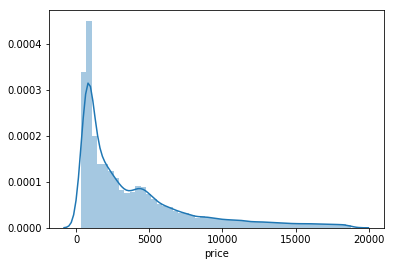

In [28]:
#create a histogram of the distribution of price
sns.distplot (df['price'])

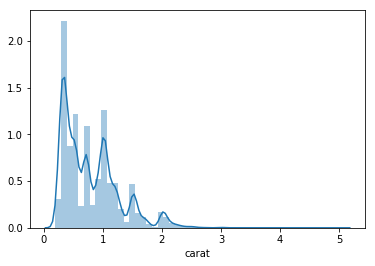

In [29]:
sns.distplot (df ['carat'])

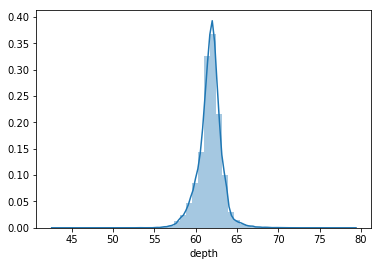

In [30]:
#a histogram of the distribution of depth
sns.distplot (df['depth'])

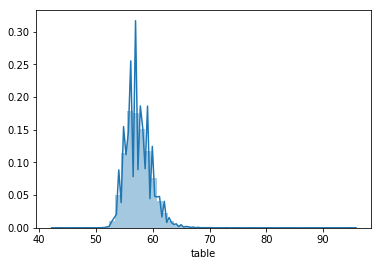

In [31]:
#a histogram of the distribution of tableS
sns.distplot (df['table'])

In [32]:
#run correlation 
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


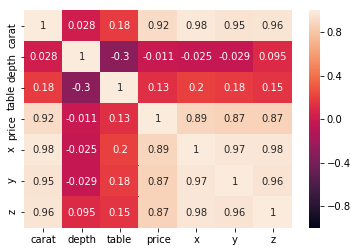

In [33]:
#show correlation of stats via heatmap
corr = df.corr()
sns.heatmap(corr, vmin=-1, annot=True)

- price and carat are highly correlated
- price and depth are negatively correlated (why?)
- x(length), y (width) and z (height) are highly correlated with price and with each other. 
- depth and table are not highly correlated with price

In [34]:
import statsmodels.formula.api as smf

In [35]:
#run regression with price as the independent variable
result = smf.ols ('price ~ carat +  depth + table + x + y + z',  data=df).fit()

In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 5.505e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:43:58   Log-Likelihood:            -4.7061e+05
No. Observations:               53920   AIC:                         9.412e+05
Df Residuals:                   53913   BIC:                         9.413e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.132e+04    456.639     46.682      0.000    2.04e+04    2.22e+04
carat       1.099e+04     66.978    164.062      0.000    1.09e+04    1.11e+04
depth       -203.0201      5.658    -35.882      0.000    -214.110    -191.930
table       -101.9364      3.079    -33.108      0.000    -107.971     -95.902
x          -1412.9648     45.781    -30.863      0.000   -1502.697   -1323.233
y             88.1662     25.683      3.433      0.001      37.828     138.504
z            -46.5781     50.091     -0.930      0.352    -144.757      51.601
==============================================================================
Omnibus:                    14157.382   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           409714.584
Skew:                           0.652   Prob(JB):                         0.00
Kurtosis:                      16.441   Cond. No.                     6.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#set coefficient to 0
result = smf.ols ('price ~ carat +  depth + table + x + y + z - 1',  data=df).fit()

In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.124e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:44:21   Log-Likelihood:            -4.7168e+05
No. Observations:               53920   AIC:                         9.434e+05
Df Residuals:                   53914   BIC:                         9.434e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9748.5848     62.716    155.441      0.000    9625.662    9871.508
depth         35.5688      2.475     14.368      0.000      30.717      40.421
table        -20.5241      2.588     -7.930      0.000     -25.597     -15.451
x           -487.0986     42.087    -11.574      0.000    -569.590    -404.607
y            211.9640     26.056      8.135      0.000     160.893     263.035
z           -929.5063     47.311    -19.647      0.000   -1022.236    -836.777
==============================================================================
Omnibus:                    15743.022   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           374913.737
Skew:                           0.860   Prob(JB):                         0.00
Kurtosis:                      15.803   Cond. No.                         874.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#run regression with fewer variables 

result = smf.ols ('price ~ carat +  depth + table',  data=df).fit()

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:44:55   Log-Likelihood:            -4.7174e+05
No. Observations:               53920   AIC:                         9.435e+05
Df Residuals:                   53916   BIC:                         9.435e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.301e+04    390.842     33.284      0.000    1.22e+04    1.38e+04
carat       7858.0632     14.152    555.253      0.000    7830.325    7885.802
depth       -151.4453      4.819    -31.426      0.000    -160.891    -142.000
table       -104.3284      3.141    -33.219      0.000    -110.484     -98.173
==============================================================================
Omnibus:                    14098.572   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154432.961
Skew:                           0.945   Prob(JB):                         0.00
Kurtosis:                      11.073   Cond. No.                     5.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#set correlation to 0
result = smf.ols ('price ~ carat +  depth + table- 1 ',  data=df).fit()

In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 2.194e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:45:22   Log-Likelihood:            -4.7228e+05
No. Observations:               53920   AIC:                         9.446e+05
Df Residuals:                   53917   BIC:                         9.446e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       7797.0979     14.177    550.002      0.000    7769.312    7824.884
depth         -7.0639      2.120     -3.331      0.001     -11.220      -2.908
table        -32.3064      2.299    -14.049      0.000     -36.813     -27.799
==============================================================================
Omnibus:                    13936.200   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157403.000
Skew:                           0.922   Prob(JB):                         0.00
Kurtosis:                      11.165   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

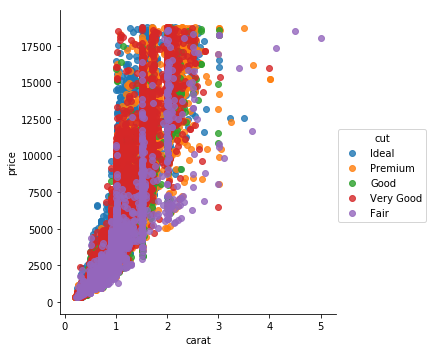

In [44]:
#add more details to scatterplot 
sns.lmplot(x='carat', y='price', data=df,
          fit_reg=False, #remove regression line
          hue ='cut') #color by cut

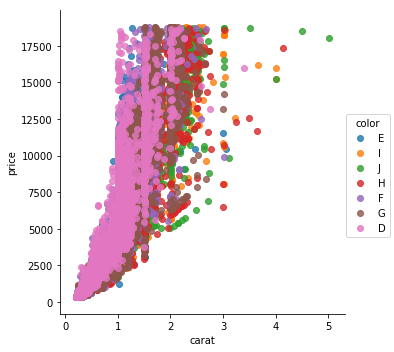

In [45]:
sns.lmplot(x='carat', y='price', data=df,
          fit_reg=False, #remove regression line
          hue ='color') #color by color

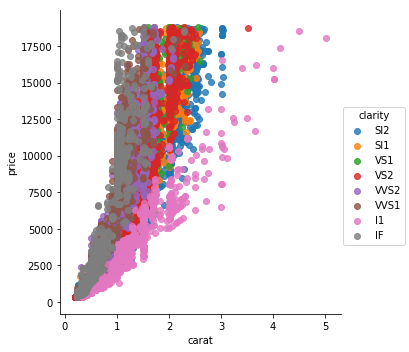

In [46]:
sns.lmplot(x='carat', y='price', data=df,
          fit_reg=False, #remove regression line
          hue ='clarity') #color by clarity

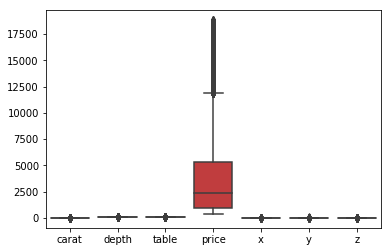

In [47]:
#boxplot showing stats for each characteristic 
sns.boxplot(data=df)
#all factors, except for price are disributed over a small scale

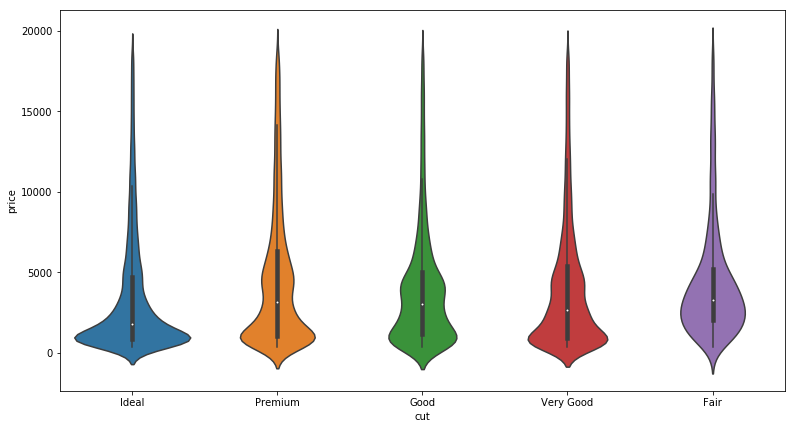

In [48]:
#change size of plot
plt.subplots(figsize=(13,7))
#violin plot shows the distribution of price for each cut
sns.violinplot(x='cut', y='price', data=df) 

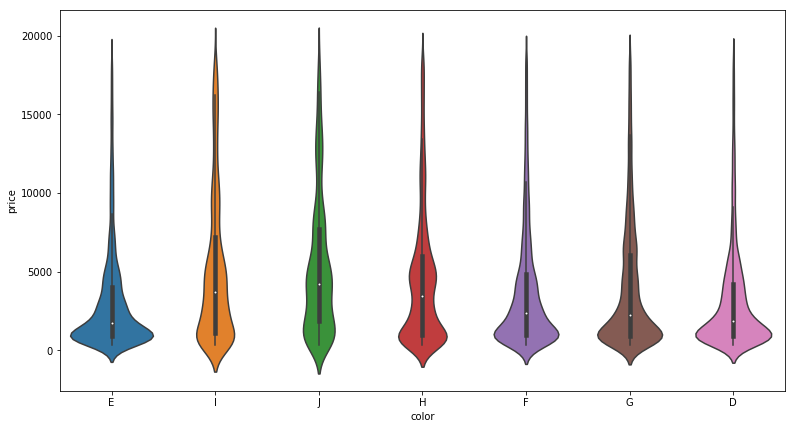

In [49]:
#change size of plot
plt.subplots(figsize=(13,7))
#violin plot shows the distribution of price for each color
sns.violinplot(x='color', y='price', data=df) 

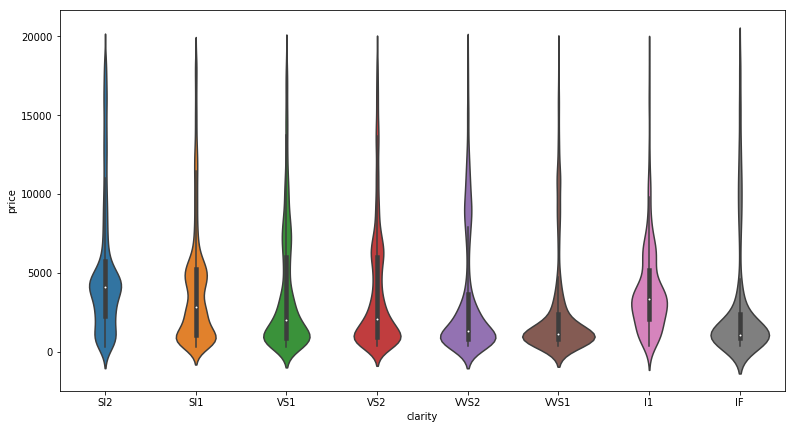

In [50]:
#change size of plot
plt.subplots(figsize=(13,7))
#violin plot shows the distribution of price for each color
sns.violinplot(x='clarity', y='price', data=df) 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

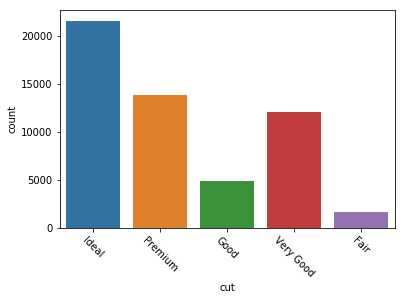

In [51]:
#create a bar plot of cut frequency
sns.countplot(x='cut',
              data=df)

plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

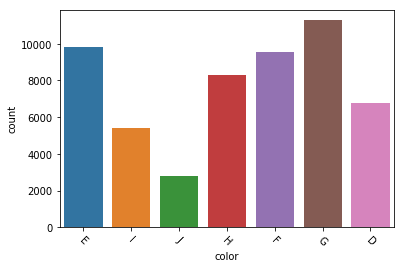

In [52]:
#create a bar plot of color frequency
sns.countplot(x='color',
              data=df)
#rotate x-axis label on chart
plt.xticks(rotation=-45)

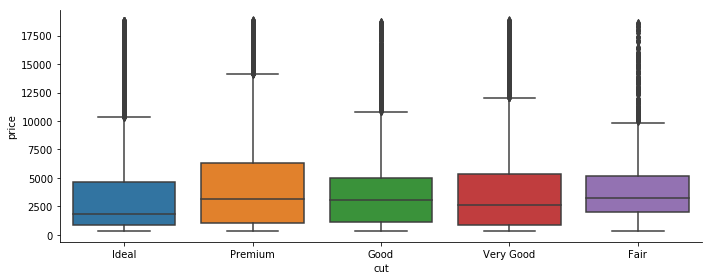

In [54]:
sns.factorplot(x='cut', y='price', data=df, kind='box', aspect=2.5)

premium diamonds are the most expensive, as is expected

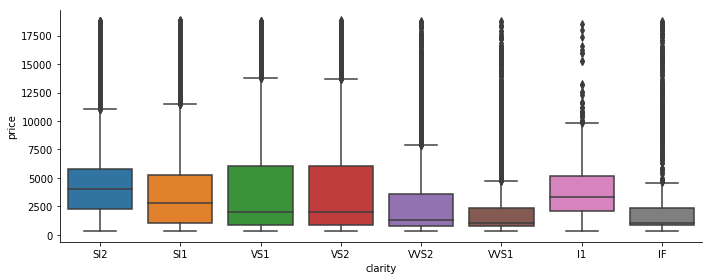

In [55]:
sns.factorplot(x='clarity', y='price', data=df, kind='box', aspect=2.5)

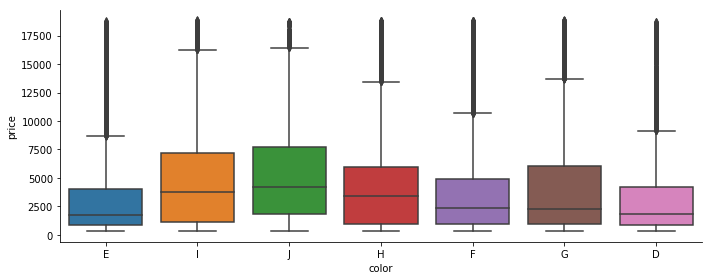

In [56]:
sns.factorplot(x='color', y='price', data=df, kind='box', aspect=2.5)

colors J and I seem to be the most expensive, followed by H

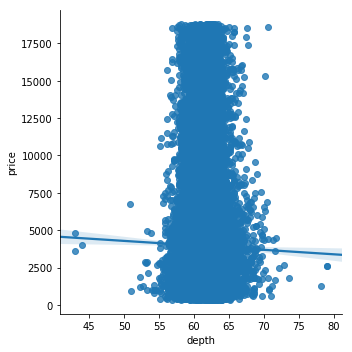

In [57]:
sns.lmplot (x='depth', y='price', data=df)

depth and price seem to be negatively correlated